In [1]:
import sys
import os
import importlib
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import HTML

# Import if using in a jupyter notebook
display(HTML("<style>.container { width:90% !important; }</style>"))

project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(os.path.join(project_dir, 'utilities'))
import utilities as utils

config_path = os.path.join(project_dir, 'config', 'dataset_config.json')
with open (config_path) as json_config:
    config_options = json.load(json_config)

In [5]:
# Run if changes are made to the notebook config file or utilities
importlib.reload(utils)
with open (config_path) as json_config:
    config_options = json.load(json_config)

<module 'utilities' from 'c:\\Users\\Jonah\\Development\\ml-prediction-correlation-visualization\\utilities\\utilities.py'>

In [2]:
config = config_options['who_life_expectancy']

home_dir = os.path.expanduser('~')
io_dir = os.path.join(home_dir, config['io_dir'].replace('/', os.sep))
source_data_path = os.path.join(io_dir, config['source_data_filename'])

In [3]:
df = pd.read_csv(source_data_path)

In [4]:
df.describe()
df.info()
# Check for missing values
df.isna().sum()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.sort_values(by=['Country']).head()
df.sort_values(by=['Country']).tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [7]:
df.loc[df['Country'] == 'Afghanistan']['Life expectancy '].median().round(0).astype(np.int64)

58

#### Cleanup
- Remove leading and trailing whitespace in the column names.
- Let's drop any rows which have a nan value for 'Life expectancy', as this is the value we care to predict.
- nan values in other variables will be handled by data imputation during the modeling process.
- Any variable scaling will be handled during the modeling process as well.
- We want 'Year' to be treated as a covariate, so let's convert it to an object type.

In [8]:
# Remove leading and trailing whitespace form the column names
df.rename(columns=lambda x: x.strip(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df = df.dropna(subset=['Life expectancy'])

In [10]:
df = df.astype({'Year': 'str'})

In [11]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   object 
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [12]:
df.sort_values(by=['Country']).head()
df.sort_values(by=['Country']).tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [13]:
df.loc[df['Country'] == 'Afghanistan']['Life expectancy'].median().round(0).astype(np.int64)

58

#### Questions
- Which variables have the srongest relationship (correlation) with life expectancy?
- Can a model provide better predictions of life expectancy than a single variable?
- How do the covariates Country, Year, and Status affect the performance of the models? 

In [14]:
corr_matrix = df.corr()
corr_matrix

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.196557,0.078756,1.000000,-0.116647,-0.085906,-0.224750,0.501038,-0.227480,0.996628,-0.171063,-0.128826,-0.175539,0.024955,-0.108643,0.556781,0.465700,0.471340,-0.145018,-0.195202
Alcohol,0.404877,-0.195848,-0.116647,1.000000,0.341112,0.086217,-0.052569,0.338253,-0.113388,0.222057,0.302902,0.222378,-0.049918,0.354406,-0.035376,-0.432302,-0.420862,0.450254,0.548001
percentage expenditure,0.381864,-0.242860,-0.085906,0.341112,1.000000,0.016704,-0.056831,0.231130,-0.088152,0.147664,0.176245,0.144022,-0.098230,0.899370,-0.025716,-0.252397,-0.253931,0.382244,0.391466
Hepatitis B,0.256762,-0.162476,-0.224750,0.086217,0.016704,1.000000,-0.121211,0.155174,-0.234353,0.483989,0.070983,0.610199,-0.113395,0.083918,-0.123834,-0.122479,-0.127039,0.199141,0.222895
Measles,-0.157586,0.031176,0.501038,-0.052569,-0.056831,-0.121211,1.000000,-0.176069,0.507718,-0.136460,-0.106405,-0.142174,0.030673,-0.076646,0.265936,0.224579,0.220836,-0.129465,-0.138344
BMI,0.567694,-0.387017,-0.227480,0.338253,0.231130,0.155174,-0.176069,1.000000,-0.237910,0.287579,0.238765,0.286077,-0.243735,0.304442,-0.072051,-0.530805,-0.537784,0.509299,0.558363
under-five deaths,-0.222529,0.094146,0.996628,-0.113388,-0.088152,-0.234353,0.507718,-0.237910,1.000000,-0.189137,-0.130355,-0.196083,0.037783,-0.112302,0.544401,0.467771,0.472244,-0.163185,-0.210945
Polio,0.465556,-0.274823,-0.171063,0.222057,0.147664,0.483989,-0.136460,0.287579,-0.189137,1.000000,0.144150,0.672130,-0.159914,0.212368,-0.038833,-0.222790,-0.223568,0.380835,0.416441


In [15]:
sns.set_context('notebook', font_scale=0.5)
cbar_kws = {'label': 'Correlation coefficient', 'orientation': 'horizontal', 'shrink': 0.75, 'pad': 0.2}
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

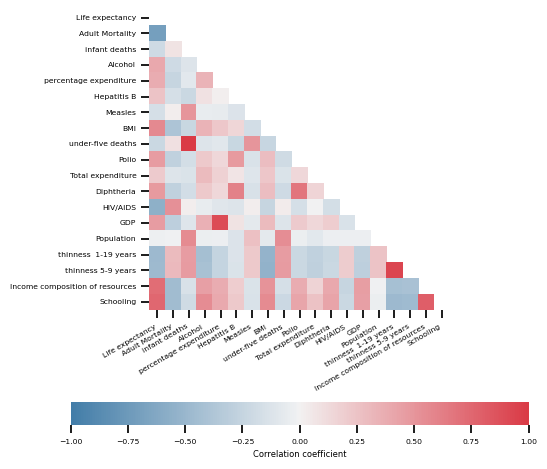

In [16]:
mask = np.triu(np.ones_like(corr_matrix))
ax = sns.heatmap(corr_matrix, mask=mask, center=0, vmin=-1, vmax=1, square=True, cmap=cmap, cbar_kws=cbar_kws)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()

Let's sort by the absolute correlation coefficients to clearly see which variables are the most predictive of life expectancy.

In [17]:
sorted_corr_matrix = corr_matrix.sort_values(by=['Life expectancy'], key=abs, ascending=False)
# Make the row and column labels line up like a typical correlation matrix so the diagonal values are 1s.
sorted_corr_matrix = sorted_corr_matrix.reindex(sorted_corr_matrix.index.tolist(), axis=1)
sorted_corr_matrix

,Life expectancy,Schooling,Income composition of resources,Adult Mortality,BMI,HIV/AIDS,Diphtheria,thinness 1-19 years,thinness 5-9 years,Polio,GDP,Alcohol,percentage expenditure,Hepatitis B,under-five deaths,Total expenditure,infant deaths,Measles,Population
Life expectancy,1.000000,0.751975,0.724776,-0.696359,0.567694,-0.556556,0.479495,-0.477183,-0.471584,0.465556,0.461455,0.404877,0.381864,0.256762,-0.222529,0.218086,-0.196557,-0.157586,-0.021538
Schooling,0.751975,1.000000,0.800046,-0.454612,0.558363,-0.222214,0.423977,-0.477434,-0.466334,0.416441,0.449920,0.548001,0.391466,0.222895,-0.210945,0.262511,-0.195202,-0.138344,-0.032008
Income composition of resources,0.724776,0.800046,1.000000,-0.457626,0.509299,-0.249380,0.401222,-0.422210,-0.410825,0.380835,0.460627,0.450254,0.382244,0.199141,-0.163185,0.166375,-0.145018,-0.129465,-0.008667
Adult Mortality,-0.696359,-0.454612,-0.457626,1.000000,-0.387017,0.523821,-0.275131,0.302904,0.308457,-0.274823,-0.296049,-0.195848,-0.242860,-0.162476,0.094146,-0.115281,0.078756,0.031176,-0.013647
BMI,0.567694,0.558363,0.509299,-0.387017,1.000000,-0.243735,0.286077,-0.530805,-0.537784,0.287579,0.304442,0.338253,0.231130,0.155174,-0.237910,0.238765,-0.227480,-0.176069,-0.072051
HIV/AIDS,-0.556556,-0.222214,-0.249380,0.523821,-0.243735,1.000000,-0.165208,0.203550,0.206772,-0.159914,-0.136782,-0.049918,-0.098230,-0.113395,0.037783,-0.000340,0.024955,0.030673,-0.027920
Diphtheria,0.479495,0.423977,0.401222,-0.275131,0.286077,-0.165208,1.000000,-0.230470,-0.223679,0.672130,0.201026,0.222378,0.144022,0.610199,-0.196083,0.159592,-0.175539,-0.142174,-0.028715
thinness 1-19 years,-0.477183,-0.477434,-0.422210,0.302904,-0.530805,0.203550,-0.230470,1.000000,0.938953,-0.222790,-0.286727,-0.432302,-0.252397,-0.122479,0.467771,-0.276047,0.465700,0.224579,0.253877
thinness 5-9 years,-0.471584,-0.466334,-0.410825,0.308457,-0.537784,0.206772,-0.223679,0.938953,1.000000,-0.223568,-0.291572,-0.420862,-0.253931,-0.127039,0.472244,-0.282789,0.471340,0.220836,0.251335
Polio,0.465556,0.416441,0.380835,-0.274823,0.287579,-0.159914,0.672130,-0.222790,-0.223568,1.000000,0.212368,0.222057,0.147664,0.483989,-0.189137,0.144150,-0.171063,-0.136460,-0.038833


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

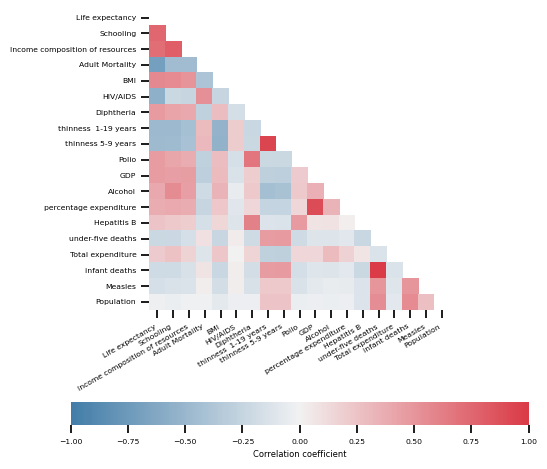

In [18]:
mask = np.triu(np.ones_like(sorted_corr_matrix.sort_values(by=['Life expectancy'], key=abs, ascending=False), dtype=bool))
ax = sns.heatmap(sorted_corr_matrix.sort_values(by=['Life expectancy'], key=abs, ascending=False), mask=mask, center=0, vmin=-1, vmax=1, square=True, cmap=cmap, cbar_kws=cbar_kws)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()

#### Some observations
- The top 5 predictive variables of Life expectancy are Schooling, Income composistion of resources, Adult Mortality, BMI, and HIV/AIDS. 
- These will be a decent benchmark when evaluating the predictions of trained models.

#### Let's prepare the input data for the ML algorithms.
- Seperate the predictor variables from the covariates.
- The covariate dataframe can be used to group rows together during data imputation.
- Dummy variables will be extracted from the covariate dataframe to test the influence of Country, Year, and Status on the model's ability to learn.

In [19]:
covar_df = df.reindex(['Country', 'Year', 'Status'], axis=1)
df = df.drop(['Country', 'Year', 'Status'], axis=1)
df.shape
covar_df.shape
df.info()
covar_df.info()

(2928, 19)

(2928, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2928 non-null   int64  
 3   Alcohol                          2735 non-null   float64
 4   percentage expenditure           2928 non-null   float64
 5   Hepatitis B                      2375 non-null   float64
 6   Measles                          2928 non-null   int64  
 7   BMI                              2896 non-null   float64
 8   under-five deaths                2928 non-null   int64  
 9   Polio                            2909 non-null   float64
 10  Total expenditure                2702 non-null   float64
 11  Diphtheria                       2909 non-null   float64
 12  HIV/AIDS            

In [160]:
# Input folder for the ML algorithm script
input_dir = os.path.join(io_dir, 'input')
df.to_csv(os.path.join(input_dir, 'df.csv'))
covar_df.to_csv(os.path.join(input_dir, 'covar_df.csv'))

#### Lastly, let's do a sanity check and look at how z-scaling the data affects the correlations.
- Standard scaling (z-scaling) is commonly done before using linear models such as linear regression.

In [21]:
# The covariates have been dropped from df at this point.
scaler = StandardScaler().fit(df)
scaler.mean_
scaled_df = pd.DataFrame(data=scaler.transform(df), index=df.index, columns=df.columns)
scaled_df.shape
scaled_df.head()

array([6.92249317e+01, 1.64796448e+02, 3.04074454e+01, 4.61485558e+00,
       7.40321185e+02, 8.09608421e+01, 2.42785587e+03, 3.82353936e+01,
       4.21793033e+01, 8.25482984e+01, 5.93016284e+00, 8.23214163e+01,
       1.74771175e+00, 7.49421072e+03, 1.27645418e+07, 4.85062155e+00,
       4.88142265e+00, 6.27418714e-01, 1.19996387e+01])

(2928, 19)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.443691,0.790238,0.267520,-1.136999,-0.336102,-0.638100,-0.110924,-0.958872,0.254061,-3.269528,0.898109,-0.730782,-0.324055,-0.483911,0.343666,2.793935,2.754279,-0.703606,-0.567762
1,-0.979279,0.854614,0.284455,-1.136999,-0.334975,-0.758037,-0.168570,-0.983927,0.272732,-1.048506,0.906164,-0.857351,-0.324055,-0.481920,-0.203803,2.861808,2.798637,-0.717829,-0.597650
2,-0.979279,0.830473,0.301391,-1.136999,-0.335128,-0.678079,-0.173968,-1.008982,0.291403,-0.877658,0.886026,-0.772972,-0.324055,-0.480586,0.310813,2.907056,2.842994,-0.746273,-0.627538
3,-1.021286,0.862660,0.326794,-1.136999,-0.332633,-0.558142,0.031273,-1.034037,0.316299,-0.664098,1.043106,-0.646403,-0.324055,-0.477910,-0.148590,2.952304,2.909530,-0.779457,-0.657426
4,-1.052791,0.886801,0.343730,-1.136999,-0.368345,-0.518163,0.050953,-1.054081,0.341194,-0.621386,0.781306,-0.604214,-0.324055,-0.520378,-0.160361,3.020176,2.953887,-0.822124,-0.747089


In [24]:
scaled_corr_matrix = scaled_df.corr()
sorted_scaled_corr_matrix = scaled_corr_matrix.sort_values(by=['Life expectancy'], key=abs, ascending=False)
# Make the row and column labels line up like a typical correlation matrix so the diagonal values are 1s.
sorted_scaled_corr_matrix = sorted_scaled_corr_matrix.reindex(sorted_scaled_corr_matrix.index.tolist(), axis=1)
sorted_scaled_corr_matrix

,Life expectancy,Schooling,Income composition of resources,Adult Mortality,BMI,HIV/AIDS,Diphtheria,thinness 1-19 years,thinness 5-9 years,Polio,GDP,Alcohol,percentage expenditure,Hepatitis B,under-five deaths,Total expenditure,infant deaths,Measles,Population
Life expectancy,1.000000,0.751975,0.724776,-0.696359,0.567694,-0.556556,0.479495,-0.477183,-0.471584,0.465556,0.461455,0.404877,0.381864,0.256762,-0.222529,0.218086,-0.196557,-0.157586,-0.021538
Schooling,0.751975,1.000000,0.800046,-0.454612,0.558363,-0.222214,0.423977,-0.477434,-0.466334,0.416441,0.449920,0.548001,0.391466,0.222895,-0.210945,0.262511,-0.195202,-0.138344,-0.032008
Income composition of resources,0.724776,0.800046,1.000000,-0.457626,0.509299,-0.249380,0.401222,-0.422210,-0.410825,0.380835,0.460627,0.450254,0.382244,0.199141,-0.163185,0.166375,-0.145018,-0.129465,-0.008667
Adult Mortality,-0.696359,-0.454612,-0.457626,1.000000,-0.387017,0.523821,-0.275131,0.302904,0.308457,-0.274823,-0.296049,-0.195848,-0.242860,-0.162476,0.094146,-0.115281,0.078756,0.031176,-0.013647
BMI,0.567694,0.558363,0.509299,-0.387017,1.000000,-0.243735,0.286077,-0.530805,-0.537784,0.287579,0.304442,0.338253,0.231130,0.155174,-0.237910,0.238765,-0.227480,-0.176069,-0.072051
HIV/AIDS,-0.556556,-0.222214,-0.249380,0.523821,-0.243735,1.000000,-0.165208,0.203550,0.206772,-0.159914,-0.136782,-0.049918,-0.098230,-0.113395,0.037783,-0.000340,0.024955,0.030673,-0.027920
Diphtheria,0.479495,0.423977,0.401222,-0.275131,0.286077,-0.165208,1.000000,-0.230470,-0.223679,0.672130,0.201026,0.222378,0.144022,0.610199,-0.196083,0.159592,-0.175539,-0.142174,-0.028715
thinness 1-19 years,-0.477183,-0.477434,-0.422210,0.302904,-0.530805,0.203550,-0.230470,1.000000,0.938953,-0.222790,-0.286727,-0.432302,-0.252397,-0.122479,0.467771,-0.276047,0.465700,0.224579,0.253877
thinness 5-9 years,-0.471584,-0.466334,-0.410825,0.308457,-0.537784,0.206772,-0.223679,0.938953,1.000000,-0.223568,-0.291572,-0.420862,-0.253931,-0.127039,0.472244,-0.282789,0.471340,0.220836,0.251335
Polio,0.465556,0.416441,0.380835,-0.274823,0.287579,-0.159914,0.672130,-0.222790,-0.223568,1.000000,0.212368,0.222057,0.147664,0.483989,-0.189137,0.144150,-0.171063,-0.136460,-0.038833


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

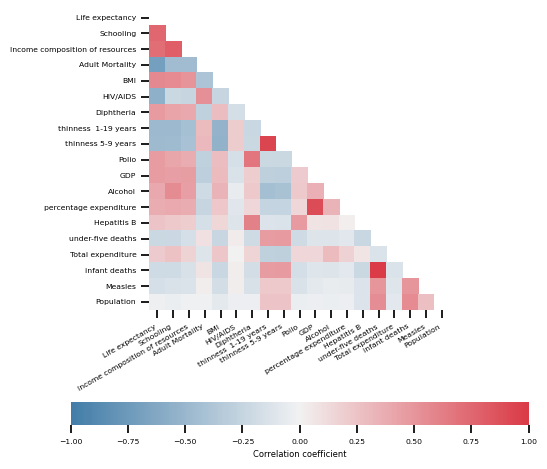

In [25]:
mask = np.triu(np.ones_like(sorted_scaled_corr_matrix.sort_values(by=['Life expectancy'], key=abs, ascending=False), dtype=bool))
ax = sns.heatmap(sorted_scaled_corr_matrix.sort_values(by=['Life expectancy'], key=abs, ascending=False), mask=mask, center=0, vmin=-1, vmax=1, square=True, cmap=cmap, cbar_kws=cbar_kws)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()

In [26]:
df.corrwith(scaled_df, axis=0)

Life expectancy                    1.0
Adult Mortality                    1.0
infant deaths                      1.0
Alcohol                            1.0
percentage expenditure             1.0
Hepatitis B                        1.0
Measles                            1.0
BMI                                1.0
under-five deaths                  1.0
Polio                              1.0
Total expenditure                  1.0
Diphtheria                         1.0
HIV/AIDS                           1.0
GDP                                1.0
Population                         1.0
thinness  1-19 years               1.0
thinness 5-9 years                 1.0
Income composition of resources    1.0
Schooling                          1.0
dtype: float64

- The original and standard scaled dataframes correlate perfectly. 